In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")
from us_visa.exceptions import USvisaException
import sys

In [10]:
df=pd.read_csv("/Users/bhagii/Desktop/USVisaApprovalPrediction/Dataset/EasyVisa.csv")
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [13]:
try:
    df.drop(columns=['case_id','requires_job_training'],inplace=True,axis=1)
    df
except Exception as e:
    raise USvisaException(e,sys)

USvisaException: Error occurred python script name [/var/folders/r0/f7sbwwvd6kg1w0zj7215hr7w0000gn/T/ipykernel_16775/4026332383.py] line number [2] error message ["['case_id', 'requires_job_training'] not found in axis"]

In [17]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

features_with_na

[]

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [21]:
df['company_age'] = current_year-df['yr_of_estab']
df.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,1082,2005,South,149907.3900,Year,Y,Certified,20


In [22]:
df.drop('yr_of_estab', inplace=True, axis=1)

In [23]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


In [24]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 7


In [25]:

discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [26]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [27]:
X = df.drop('case_status', axis=1)
y = df['case_status']

In [29]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [30]:
y= np.where(y=='Denied', 0,1)

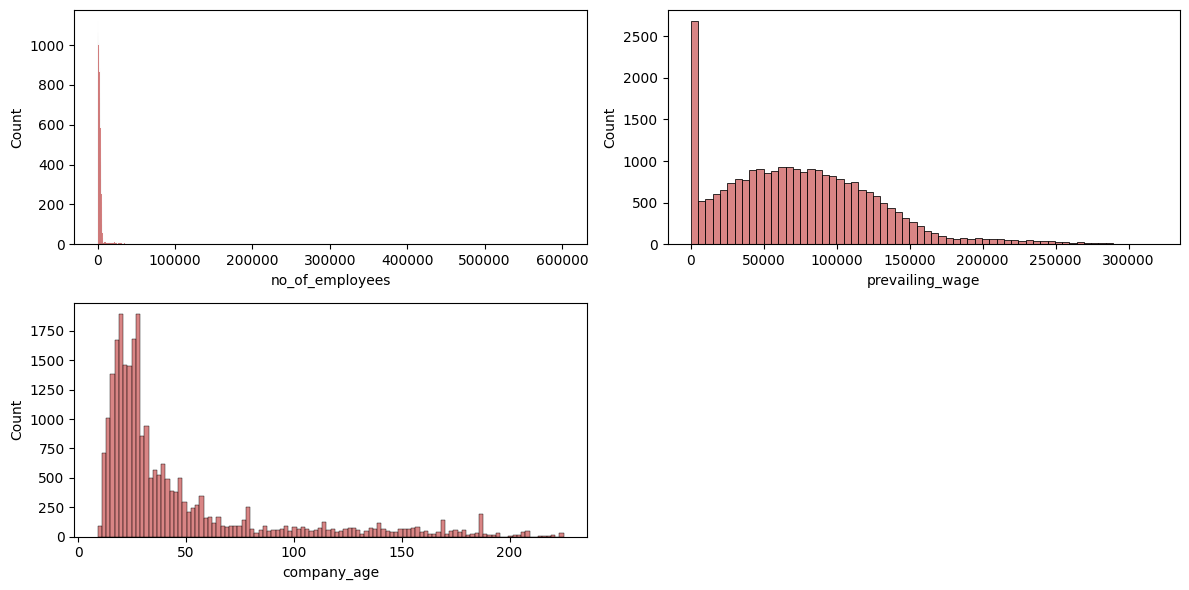

In [31]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [32]:
X[continuous_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [35]:
pt=PowerTransformer(method='yeo-johnson')
transform_features = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [38]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

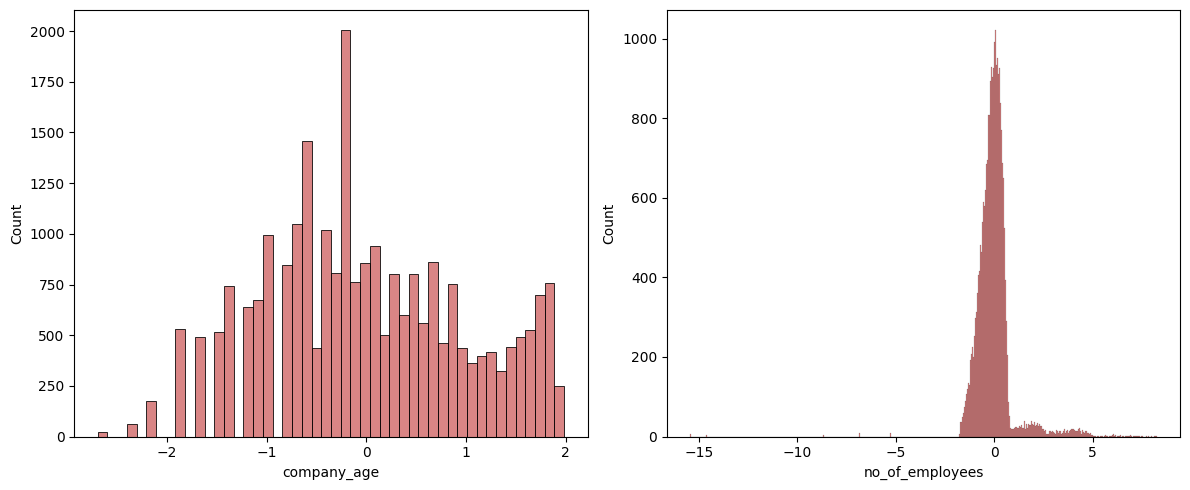

In [39]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [40]:
X_copy.skew(axis=0, skipna=True)

company_age        0.112260
no_of_employees    0.399339
dtype: float64

In [41]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


In [42]:
num_features = list(X.select_dtypes(exclude="object").columns)
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [45]:
or_columns = ['has_job_experience','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [46]:
X = preprocessor.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]], shape=(25480, 23))

In [49]:
from imblearn.combine import SMOTETomek,SMOTEENN

smt=SMOTEENN(random_state=42,sampling_strategy='minority')

X_res,y_res=smt.fit_resample(X,y)

In [50]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13540, 23), (3386, 23))

In [55]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay,recall_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [56]:
def evaluation_metrics(true,pred):
    acc=accuracy_score(true,pred)
    f1=f1_score(true,pred)
    precision=precision_score(true,pred)
    recall=recall_score(true,pred)
    roc_auc=roc_auc_score(true,pred)

    return acc, f1, precision, recall , roc_auc

In [57]:
models={
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K Nearest Neighbors Classifier":KNeighborsClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Logistic Regression":LogisticRegression(),
    "XGBoost Classifier":XGBClassifier(),
    "CatBoost Classifier":CatBoostClassifier(),
}

In [61]:
def training_and_evaluation(X_train, X_test, y_train, y_test,models):

    models_list = []
    accuracy_list = []
    auc= []

    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluation_metrics(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluation_metrics(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report
    

In [62]:
base_model_report = training_and_evaluation(X_train, X_test, y_train, y_test,models)

RandomForestClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9566
- F1 score: 0.9528
- Precision: 0.9562
- Recall: 0.9495
- Roc Auc Score: 0.9561


AdaBoostClassifier
Model performance for Training set
- Accuracy: 0.8530
- F1 score: 0.8406
- Precision: 0.8366
- Recall: 0.8447
- Roc Auc Score: 0.8524
----------------------------------
Model performance for Test set
- Accuracy: 0.8582
- F1 score: 0.8469
- Precision: 0.8442
- Recall: 0.8496
- Roc Auc Score: 0.8576


GradientBoostingClassifier
Model performance for Training set
- Accuracy: 0.8832
- F1 score: 0.8734
- Precision: 0.8688
- Recall: 0.8780
- Roc Auc Score: 0.8828
----------------------------------
Model performance for Test set
- Accuracy: 0.8875
- F1 score: 0.8792
- Precision: 0.8712
- Recall: 0.8874
- Roc Auc Score: 0.8875


Support Vector Classifier
Mo

In [63]:
base_model_report

,Model Name,Accuracy
0,RandomForestClassifier,0.956586
4,K Nearest Neighbors Classifier,0.936208
7,XGBoost Classifier,0.930301
8,CatBoost Classifier,0.928825
5,Decision Tree Classifier,0.925281
2,GradientBoostingClassifier,0.887478
3,Support Vector Classifier,0.868872
1,AdaBoostClassifier,0.858240
6,Logistic Regression,0.734790


In [64]:
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [66]:
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [67]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.2s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.3s
[CV] END ....................max_depth=5, min_child_weight=3; total time=   0.3s
[CV] END ....................max_depth=5, min_ch

In [68]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}}

In [69]:
best_models={
    "XGBoost Classifier":XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "RandomForestClassifier":RandomForestClassifier(**model_param['RF']),
    "K Nearest Neighbors Classifier":KNeighborsClassifier(**model_param['KNN']),
}

tuned_report=training_and_evaluation(X_train, X_test, y_train, y_test,best_models)

XGBoost Classifier
Model performance for Training set
- Accuracy: 0.9996
- F1 score: 0.9995
- Precision: 1.0000
- Recall: 0.9990
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.9454
- F1 score: 0.9406
- Precision: 0.9434
- Recall: 0.9379
- Roc Auc Score: 0.9448


RandomForestClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9566
- F1 score: 0.9527
- Precision: 0.9591
- Recall: 0.9463
- Roc Auc Score: 0.9558


K Nearest Neighbors Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9696
- F1 score: 0.9665
- Precision: 0.9815
- Recall: 0.9520
- Roc Auc Score: 0.9683




In [70]:
tuned_report

,Model Name,Accuracy
2,K Nearest Neighbors Classifier,0.969581
1,RandomForestClassifier,0.956586
0,XGBoost Classifier,0.945363


In [71]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9696
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1823
           1       0.98      0.95      0.97      1563

    accuracy                           0.97      3386
   macro avg       0.97      0.97      0.97      3386
weighted avg       0.97      0.97      0.97      3386



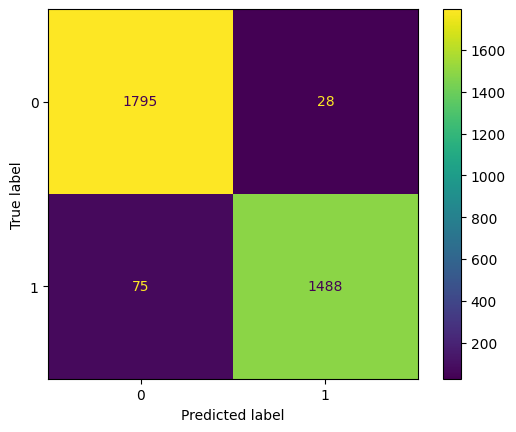

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)